In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in data
data = pd.read_csv('/Users/deepshikasharma/Downloads/Viamo_sample/3m_uganda-3m_uganda_000000000013.csv')

In [3]:
#select relevant columns for analysis
mau = data[['call_date','new_listener_ever']]

In [4]:
#convert not null values (integer) to Yes in new_listener_ever column
mau.loc[mau['new_listener_ever'].notnull(), 'new_listener_ever'] = "Yes"

In [5]:
#convert not-a-number values (NaN) to No in new_listener_ever column
mau['new_listener_ever'] = mau['new_listener_ever'].replace(np.nan, "No")

In [6]:
#convert call_date data type from object to datetime
mau['call_date'] = pd.to_datetime(mau.call_date)

In [7]:
#extract month from call_date column 
mau['Month'] = mau['call_date'].dt.month_name()

In [8]:
#remove call_date column
mau.drop('call_date', inplace = True, axis=1)

In [9]:
#clean up new_listener_ever column title
mau.rename(columns = {'new_listener_ever':'New Listeners'}, inplace = True)

In [10]:
#create function to replace subscriber_id as new listeners values with "Yes" values
def new (mau):
    if mau['New Listeners'] == "Yes":
        return "Yes"
    else:
        return np.NaN

In [11]:
mau['New'] = mau.apply(lambda mau: new(mau), axis=1)

In [12]:
#create function to replace NaN values with "No" to show current listeners
def current (mau):
    if mau['New Listeners'] == "No":
        return "Yes"
    else:
        return np.NaN

In [13]:
#create new column for current values 
mau['Current'] = mau.apply(lambda mau: current(mau), axis=1)

In [14]:
#drop new_listener_ever column
mau.drop('New Listeners', inplace = True, axis=1)

In [15]:
#count number of new and current listeners for each month
df = mau.groupby('Month').count().reset_index()

In [16]:
#just making sure df is a dataframe before next operation
df = pd.DataFrame(df)

In [17]:
#create three new series (columns) in dataframe. 
#first one for total amount of users for each month 
df['Total'] = df['New'] + df['Current'] 
#second one for percentage of new users
df['New %'] = df['New'] / df['Total']
#fromat values as percentage
df['New %'] = df['New %'].transform(lambda x:'{:,.1%}'.format(x))
#third one for percentage of current users
df['Current %'] = df['Current'] / df['Total']
#fromat values as percentage
df['Current %'] = df['Current %'].transform(lambda x:'{:,.1%}'.format(x))
#remove the percentage sign
df['New %'] = df['New %'].str.rstrip('%').astype('float')
df['Current %'] = df['Current %'].str.rstrip('%').astype('float')

**Note**: when connecting to full database, change `months_categories` to include all 12 months.

In [18]:
#need to custom sort the dataframe by month in chronological order
months_categories = ["August", "September", "October", "November"]
df["Month"] = pd.Categorical(df["Month"], categories = months_categories)
df = df.sort_values(by = "Month")

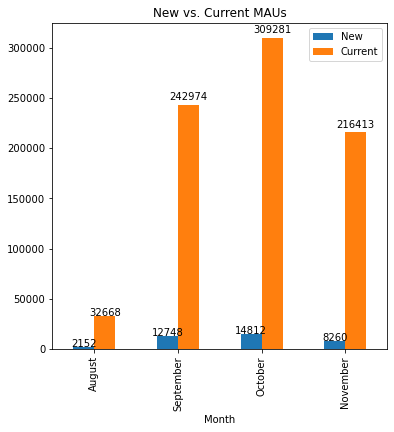

In [19]:
#create plot one
plt.rcParams["figure.figsize"] = (6, 6)
ax = df.plot(x='Month', y =['New','Current'],kind='bar')
ax.set_title('New vs. Current MAUs')
ax.legend(bbox_to_anchor=(1.0, 1.0))

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

plt.savefig('New_vs_Current_MAUs_Count.jpeg', bbox_inches='tight')

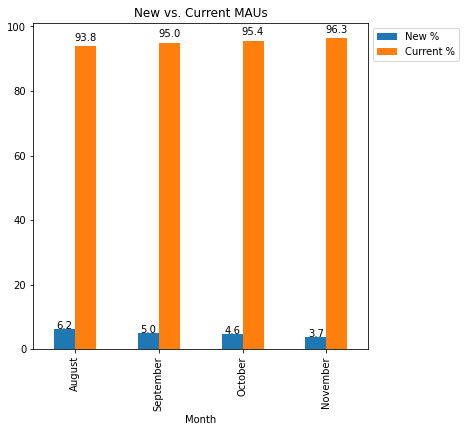

In [20]:
#create plot two
plt.rcParams["figure.figsize"] = (6, 6)
ax = df.plot(x='Month', y =['New %','Current %'],kind='bar')
ax.set_title('New vs. Current MAUs')
ax.legend(bbox_to_anchor=(1.0, 1.0))

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
plt.savefig('New_vs_Current_MAUs_%.jpeg', bbox_inches='tight')